In [2]:
#installation de virtualenv pour créer des projets Python isolés
%pip install virtualenv

Note: you may need to restart the kernel to use updated packages.


In [92]:
#importation des librairie nécessaire au projet
import pandas as pd
import numpy as np

#chargement et affichage des données
data = pd.read_csv('p2-arbres-fr.csv', sep=';')
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [93]:
#on analyse le type des paramètres
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [94]:
#On affiche les valeurs manquantes par colonne
Nan_value = data.isnull().sum()
print(Nan_value)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


In [95]:
#il y a de nombreuses valeurs manquantes mais dans des colonnes qui n'aide pas à l'analyse du dataframe
#on supprime les colonnes inutiles à notre analyse
#on va supprimer les valeurs manquantes uniquement pour domanialité et libelle_francais

In [96]:
data.drop(['type_emplacement', 'complement_addresse', 'numero', 'lieu',\
          'id_emplacement', 'genre', 'espece', 'variete', 'stade_developpement',\
          'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'], axis=1, inplace=True)

In [97]:
#on supprime les valeurs manquantes
index_null_value = data[data['domanialite'].isna()].index
data.drop(index_null_value , inplace=True)
index_null_value = data[data['libelle_francais'].isna()].index
data.drop(index_null_value , inplace=True)
index_null_value = data[data['libelle_francais']== 'Non spécifié'].index
data.drop(index_null_value, inplace=True)

In [98]:
#supprimer les 1497 lignes de libellé français est marginal par rapport au 200k individus

In [99]:
Nan_value = data.isnull().sum()
print(Nan_value)

id                  0
domanialite         0
arrondissement      0
libelle_francais    0
circonference_cm    0
hauteur_m           0
dtype: int64


In [100]:
#on analyse les données du projets
data.describe()

,id,circonference_cm,hauteur_m
count,1.986390e+05,198639.000000,198639.000000
mean,3.832629e+05,83.556155,13.155352
std,5.405406e+05,675.691484,1978.636141
min,9.987400e+04,0.000000,0.000000
25%,1.555895e+05,30.000000,5.000000
50%,2.206870e+05,70.000000,8.000000
75%,2.736185e+05,115.000000,12.000000
max,2.024745e+06,250255.000000,881818.000000


In [101]:
#on se rend compte qu'il y a des outliers pour la hauteur_m et la circonference_cm

In [102]:
#on modifie l'échelle de valeur pour pouvoir traiter les données correctement
data['circonference_cm'] = data['circonference_cm'] / 100
#et on modifie l'unité du titre de la colonne
data.rename(columns={ 'circonference_cm': 'circonference_m' }, inplace=True)

In [104]:
#on analyse les outliers
data[data['circonference_m'] > 10]

,id,domanialite,arrondissement,libelle_francais,circonference_m,hauteur_m
5264,106662,Jardin,PARIS 7E ARRDT,Micocoulier,24.39,19
5717,107152,Jardin,PARIS 14E ARRDT,Robinier,11.33,10
5979,107423,Jardin,PARIS 7E ARRDT,Tilleul,11.38,15
5993,107438,Jardin,PARIS 7E ARRDT,Platane,23.00,6
6340,107808,Jardin,PARIS 7E ARRDT,Tilleul,11.20,13
...,...,...,...,...,...,...
189561,2012016,Jardin,PARIS 17E ARRDT,Hêtre,13.37,8
191872,2014645,Jardin,BOIS DE VINCENNES,Hêtre,11.90,22
192901,2015685,Jardin,BOIS DE VINCENNES,Pin,12.00,22
198023,2021947,Alignement,PARIS 15E ARRDT,Erable,27.50,10


In [105]:
data[data['hauteur_m'] >= 100]

,id,domanialite,arrondissement,libelle_francais,circonference_m,hauteur_m
5392,106800,Jardin,PARIS 7E ARRDT,Tilleul,1.00,1510
6473,107951,Jardin,PARIS 7E ARRDT,Platane,1.12,117
12536,115062,Jardin,PARIS 16E ARRDT,Erable,0.47,255
15373,118412,Jardin,PARIS 7E ARRDT,Paulownia,1.45,810
24099,128185,Jardin,PARIS 17E ARRDT,Platane,1.30,125
...,...,...,...,...,...,...
189053,2011417,Jardin,BOIS DE VINCENNES,Pin,0.60,150
189441,2011863,DFPE,PARIS 16E ARRDT,Marronnier,0.08,157
189518,2011961,Alignement,BOIS DE BOULOGNE,Platane,0.67,105
197136,2020792,Jardin,PARIS 14E ARRDT,Erable,1.45,125


In [106]:
#il y a l'air d'y avoir de nombreuses valeurs incohérentes avec les autres paramètres des individus
#ces valeurs incohérentes sont difficiles à déterminer 

In [107]:
#on arrive pas à analyse les outliers de cette manière donc on fait une étude approfondie sur chaque arbre
print(data['libelle_francais'].unique())

['Marronnier' 'If' 'Erable' 'Arbre à miel' 'Platane' 'Sophora'
 'Prunus n. sp.' 'Hêtre' 'Micocoulier' 'Tilleul' 'Chêne' 'Savonnier'
 'Copalme' 'Noyer' 'Arbre à caramel' 'Troene' 'Tulipier' 'Pin' 'Sapin'
 'Cerisier à fleurs' 'Charme-Houblon' 'Cèdre' 'Paulownia' 'Thuya'
 'Pommier à fleurs' 'Poirier' 'Pommier' 'Bouleau' 'Orme' 'Arbre de Judée'
 'Robinier' 'Frêne' 'Aubépine' 'Fevier' 'Prunier à fleurs'
 'Arbre aux quarante écus' 'Néflier commun' 'Saule' 'Magnolia'
 'Prunier à fruits' 'Poirier à fleurs' 'Peuplier' 'Faux-cyprès' 'Aubepine'
 'Plaqueminier' 'Mûrier' 'Pêcher' 'Pterocarya' 'Merisier'
 'Noisetier de Byzance' 'Alisier' 'Cognassier'
 'Parrotie de Perse - Arbre de fer' 'Poirier à fruits' 'Orme de Sibérie'
 'Frêne à fleurs' 'Aulne' 'Troëne' 'Fontanesia' 'Cornouiller' 'Cedrele'
 'Catalpa' 'Houx' 'Buis' 'Metaséquoia' 'Chicot du Canada'
 'Oranger des Osages' 'Céphalotaxe' 'Sumac' 'Châtaignier' 'Ailante'
 'Sequoia' 'Lilas des indes' 'Pterostyrax' 'Eucalyptus' 'Olivier'
 'Figuier' 'Charme

In [108]:
#Combien il y a d'espèces d'arbres différentes
data['libelle_francais'].unique().shape

(192,)

In [112]:
#On se rend compte que de nombreux arbres on des valeurs aberrantes par rapport à leur espèce
#un tilleul fait en moyenne 20 mètres avec des cas exceptionnel à 50 mètres
data.loc[(data['libelle_francais'] == 'Tilleul') & (data['hauteur_m'] >= 100), :]

,id,domanialite,arrondissement,libelle_francais,circonference_m,hauteur_m
5392,106800,Jardin,PARIS 7E ARRDT,Tilleul,1.00,1510
113295,234857,Alignement,PARIS 19E ARRDT,Tilleul,0.75,106
120292,243307,Alignement,PARIS 19E ARRDT,Tilleul,0.70,610
120370,243386,Alignement,PARIS 19E ARRDT,Tilleul,0.80,107
151364,275451,Alignement,PARIS 7E ARRDT,Tilleul,75.40,815
151382,275469,Alignement,PARIS 7E ARRDT,Tilleul,0.85,1515
151443,275530,Alignement,PARIS 7E ARRDT,Tilleul,1.30,110
151647,275737,Alignement,PARIS 7E ARRDT,Tilleul,0.65,118
151918,276009,Alignement,PARIS 7E ARRDT,Tilleul,1.80,218
152205,276297,Alignement,PARIS 7E ARRDT,Tilleul,1.30,1815


In [113]:
#on effectue une moyenne pour les tilleuls pour se rendre compte des impacts que peuvent avoir les valeurs aberrantes
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].mean()

50.58502698896972

In [114]:
#on étudie l'interquartile pour se rendre compte des vrais valeurs
#on modifie la dernière valeur à 99% pour perdre le moins d'information possible
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].quantile([0.25, 0.50, 0.99])

0.25     5.0
0.50    10.0
0.99    20.0
Name: hauteur_m, dtype: float64

In [115]:
#on retombe sur des valeurs plus corrects pour cette catégorie d'arbre

In [117]:
#on effectue une visualisation des espèces d'arbres par rapport à leur hauteur pour avoir un vision plus large de la 
#problématique
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 400))

names = data['libelle_francais'].unique()

data_tree_height = []
for name in names:
    data_tree_height.append(data[data['libelle_francais'] == name]['hauteur_m'])

plt.boxplot(data_tree_height, labels=names, vert=False, showfliers=False)#on supprime les outliers

plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.title('Répartition des Hauteurs (m) par espèce', fontsize=50)
plt.grid(True)
plt.show()

In [118]:
#on va supprimer les valeurs qui ressemblent à des valeurs aberrante par rapport à 95% des autres valeurs
tree_name = data['libelle_francais'].unique()
for i in tree_name:
    last_quantile = data[data['libelle_francais'] == i]['hauteur_m'].quantile([0.25, 0.50, 0.95])
    index_drop_value = data.loc[(data['libelle_francais'] == i) & (data['hauteur_m'] > last_quantile.loc[0.95])].index
    data.drop(index_drop_value , inplace=True)
    

In [120]:
#on retrouve une valeur plus correct pour l'exemple du tilleul
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].mean()

7.969217151848937

In [121]:
#on fait de même pour la circonférence
tree_name = data['libelle_francais'].unique()
for i in tree_name:
    last_quantile = data[data['libelle_francais'] == i]['circonference_m'].quantile([0.25, 0.50, 0.95])
    index_drop_value = data.loc[(data['libelle_francais'] == i) & (data['circonference_m'] > last_quantile.loc[0.95])].index
    data.drop(index_drop_value , inplace=True)

In [123]:
#les valeurs semblent mieux correspondre à la réalité
data.describe()

,id,circonference_m,hauteur_m
count,1.815710e+05,181571.000000,181571.000000
mean,3.836230e+05,0.698294,7.583281
std,5.387067e+05,0.514576,5.512327
min,9.987400e+04,0.000000,0.000000
25%,1.578665e+05,0.300000,4.000000
50%,2.219900e+05,0.650000,8.000000
75%,2.737235e+05,1.050000,11.000000
max,2.024745e+06,3.350000,27.000000


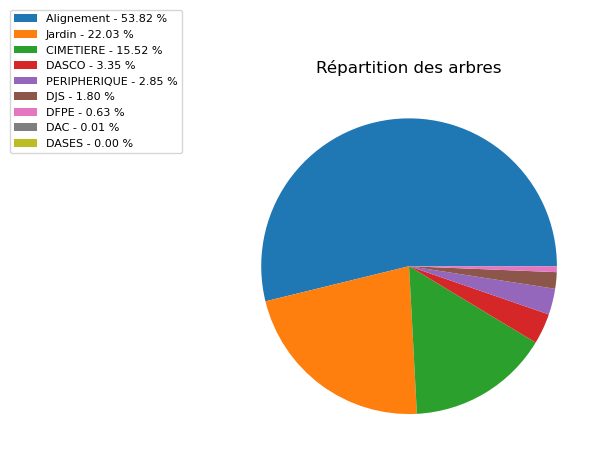

In [168]:
#on peut désormais effectuer les représentations graphiques
x = data['domanialite'].value_counts().index.tolist()
y = data['domanialite'].value_counts()
percent = 100.*y/y.sum()

patches, texts = plt.pie(y)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.title('Répartition des arbres')
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
#plt.savefig('piechart.png', bbox_inches='tight')

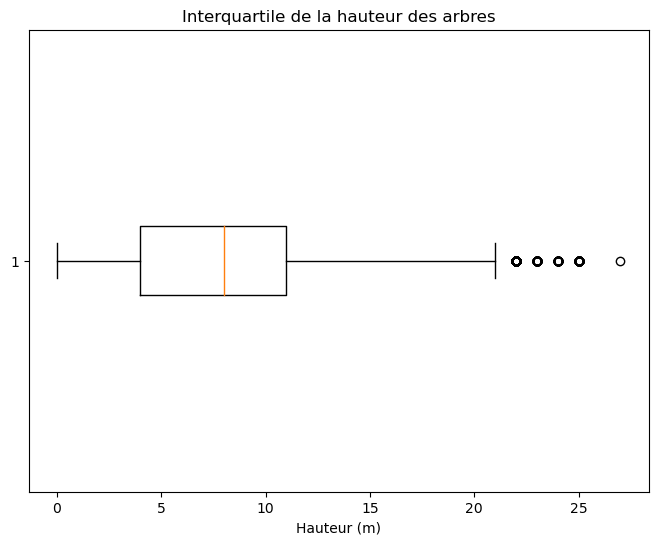

In [171]:
#interquartile de la hauteur des arbres
boxplot_height = data['hauteur_m']
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_height, vert=False)
plt.xlabel('Hauteur (m)')
plt.title('Interquartile de la hauteur des arbres')
plt.show()

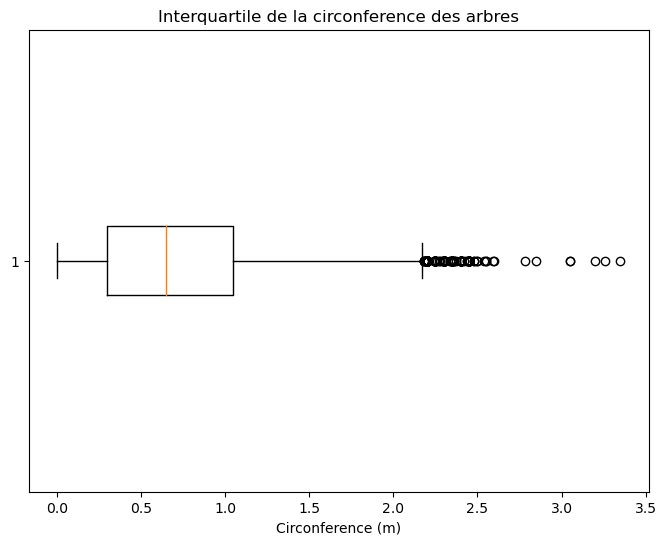

In [173]:
#interquartile de la circonférence des arbres
boxplot_circumference = data['circonference_m']
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_circumference, vert=False)
plt.xlabel('Circonference (m)')
plt.title('Interquartile de la circonference des arbres')
plt.show()

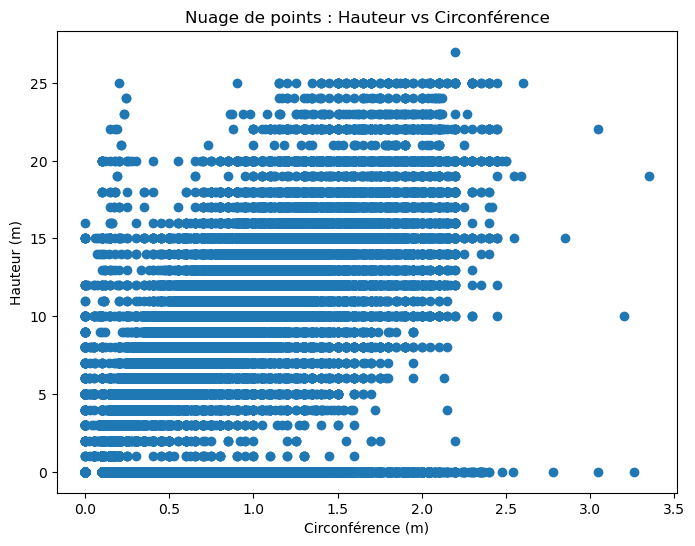

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(data['circonference_m'], data['hauteur_m'])
plt.xlabel('Circonférence (m)')
plt.ylabel('Hauteur (m)')
plt.title('Nuage de points : Hauteur vs Circonférence')
plt.show()

In [178]:
#je souhaite afficher le nombre d'arbre par arrondissement
data['arrondissement'].unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE VINCENNES',
       'BOIS DE BOULOGNE'], dtype=object)

In [181]:
data.shape

(181571, 6)

In [191]:
#je souhaite conserver uniquement les arrondissements parisiens, j'élimine tout ce qui se trouve à l'extérieur
#du périphérique parisien
data.drop(data[data['arrondissement'] == 'HAUTS-DE-SEINE'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'VAL-DE-MARNE'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'SEINE-SAINT-DENIS'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'BOIS DE VINCENNES'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'BOIS DE BOULOGNE'].index, inplace=True)
data.shape

(145727, 6)

In [215]:
#J'affiche le nombre d'arbre par arrondissement
data['arrondissement'].value_counts()

PARIS 15E ARRDT    16127
PARIS 13E ARRDT    15300
PARIS 16E ARRDT    14888
PARIS 20E ARRDT    13522
PARIS 19E ARRDT    11890
PARIS 12E ARRDT    11672
PARIS 17E ARRDT    10280
PARIS 14E ARRDT    10094
PARIS 18E ARRDT     9140
PARIS 7E ARRDT      7645
PARIS 8E ARRDT      6606
PARIS 11E ARRDT     5319
PARIS 10E ARRDT     2998
PARIS 4E ARRDT      2500
PARIS 5E ARRDT      2041
PARIS 6E ARRDT      1641
PARIS 1ER ARRDT     1316
PARIS 3E ARRDT      1128
PARIS 9E ARRDT      1107
PARIS 2E ARRDT       513
Name: arrondissement, dtype: int64

In [227]:
counts_series = data['arrondissement'].value_counts()

nombre_resultats = counts_series.values

df_test = nombre_resultats
df_test.sort()
df_test

array([  513,  1107,  1128,  1316,  1641,  2041,  2500,  2998,  5319,
        6606,  7645,  9140, 10094, 10280, 11672, 11890, 13522, 14888,
       15300, 16127])

Valeur : 513, Couleur Hex : #f7fcf5
Valeur : 1107, Couleur Hex : #f0f9ec
Valeur : 1128, Couleur Hex : #e8f6e4
Valeur : 1316, Couleur Hex : #ddf2d8
Valeur : 1641, Couleur Hex : #d1edcb
Valeur : 2041, Couleur Hex : #c3e7bc
Valeur : 2500, Couleur Hex : #b4e1ad
Valeur : 2998, Couleur Hex : #a3da9d
Valeur : 5319, Couleur Hex : #91d28e
Valeur : 6606, Couleur Hex : #7dc87e
Valeur : 7645, Couleur Hex : #6abf71
Valeur : 9140, Couleur Hex : #53b466
Valeur : 10094, Couleur Hex : #3fa95c
Valeur : 10280, Couleur Hex : #329b51
Valeur : 11672, Couleur Hex : #268e47
Valeur : 11890, Couleur Hex : #17813d
Valeur : 13522, Couleur Hex : #097532
Valeur : 14888, Couleur Hex : #006529
Valeur : 15300, Couleur Hex : #005522
Valeur : 16127, Couleur Hex : #00441b


/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_5057/649846698.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(valeurs, [1] * len(valeurs), c=colors, s=100, cmap='Greens', edgecolors='k')


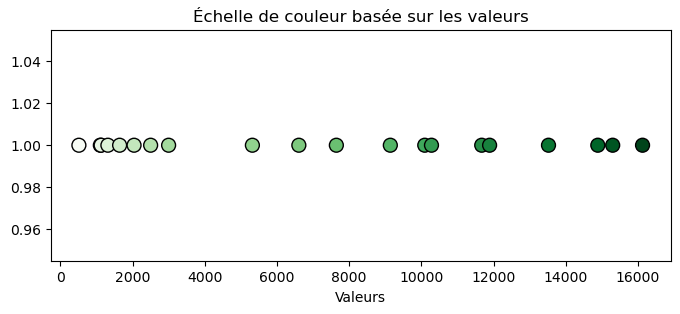

In [230]:
import matplotlib
import matplotlib.colors as mcolors
valeurs = df_test

cmap = matplotlib.colormaps['Greens']
colors = cmap(np.linspace(0, 1, len(valeurs)))

hex_values = [mcolors.to_hex(color) for color in colors]

for valeur, color_Hex in zip(valeurs, hex_values):
    print(f"Valeur : {valeur}, Couleur Hex : {color_Hex}")

plt.figure(figsize=(8, 3))
plt.scatter(valeurs, [1] * len(valeurs), c=colors, s=100, cmap='Greens', edgecolors='k')
#plt.colorbar(orientation='horizontal')
plt.xlabel('Valeurs')
plt.title('Échelle de couleur basée sur les valeurs')
plt.show()